# Practical session 2 - Practise with classic libraries

Students (pair):
- [Student 1: Auger Eloise]([link](https://github.com/eloiseauger))
- [Student 2: Buscaylet Alexandre]([link](https://github.com/buscaaa))

**Useful references for this lab**:

[1] `numpy`: [lecture notes (1.4.1-1.4.2)](https://scipy-lectures.org/intro/numpy/index.html) and [documentation](https://numpy.org/doc/stable/)

[2] `pandas`: [documentation](https://pandas.pydata.org/docs/getting_started/index.html), [quick tutorial](https://pandas.pydata.org/pandas-docs/version/0.15/10min.html)

[3] `matplotlib`: [lecture notes (1.5)](https://scipy-lectures.org/intro/matplotlib/index.html) and [documentation](https://matplotlib.org/)

[4] `h5py`: [quick start guide](http://docs.h5py.org/en/stable/quick.html#quick)

## <a name="content">Contents</a>
- [Exercise 1: Computing basic statistics](#ex1)
- [Exercise 2: Random variables and histograms](#ex2)
- [Exercise 3: Discrete isotropic total variation](#ex3)
---

In [2]:
%load_ext autoreload
%autoreload 2

---
## <a name="ex1">Exercise 1: Random variables and histograms</a>

In this exercise, we are interested in generating samples from the Gamma distribution $\mathcal{G}(\alpha,\beta)$, of probability density function (pdf)

\begin{equation}
    p(x) = \frac{\beta^\alpha}{\Gamma(\alpha)} x^{\alpha-1} \exp(-\beta x) \mathbb{1}_{\mathbb{R}_+^*}(x),
\end{equation}

and displaying their histogram. In the following, we consider $(\alpha, \beta) = (9, 2)$.

1\. Set the random seed to a fixed value for reproducibility, and biefly check your instruction works as intended.
> Hint: you may take a look at the following pages: [random module](https://numpy.org/doc/stable/reference/random/index.html?highlight=random#module-numpy.random), [random generator](https://numpy.org/doc/stable/reference/random/generator.html).

**Answer**:

In [3]:
import numpy as np
import matplotlib.pyplot as plt

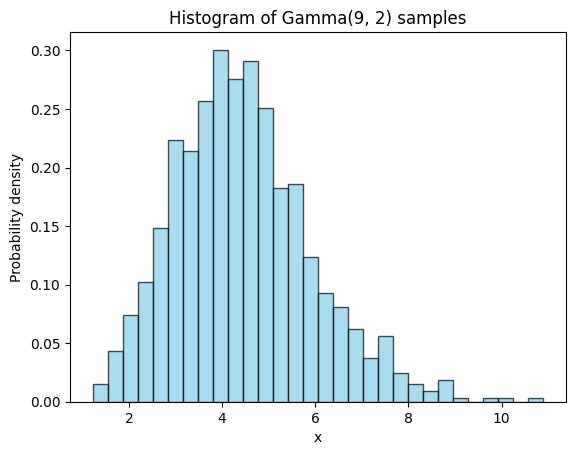

In [4]:
rng = np.random.default_rng(seed=42)  # seed fixe

alpha = 9
beta = 2

samples_test = rng.gamma(shape=alpha, scale=1/beta, size=1000)

plt.hist(samples_test, bins=30, density=True, alpha=0.7, color='skyblue', edgecolor='black')
plt.title(f"Histogram of Gamma({alpha}, {beta}) samples")
plt.xlabel("x")
plt.ylabel("Probability density")
plt.show()


2\. Generate $\approx 10^5$ samples in a vector. Save the vector in a file, `samples.hdf5` or `samples.npy`.
> Warning / hint: 
> - take a careful look at the [documentation](https://numpy.org/doc/stable/reference/random/generated/numpy.random.gamma.html?highlight=gamma#numpy.random.gamma) (multiple conventions exist for the definition of the pdf underlying the distribution...);
> - to save data in a `npy` file, take a look at the example reported in the [Numpy documentation](https://numpy.org/doc/stable/reference/generated/numpy.save.html);
> - to save data in a `.h5` file, take a quick look at the [documentation here](https://docs.h5py.org/en/stable/quick.html#quick).

**Answer**:

In [5]:
size = 10000
samples = rng.gamma(shape=alpha, scale=1/beta, size=size)
np.save("samples.npy", samples)

3\. Estimate an histogram of this distribution for a well chosen set of bins, and display it.
> Warnings: 
> - make sure the [histogram](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html?highlight=hist#matplotlib.pyplot.hist) corresponds to a probability density function (pdf);
> - do not forget to include a proper title with names for the axes.

**Answer**:

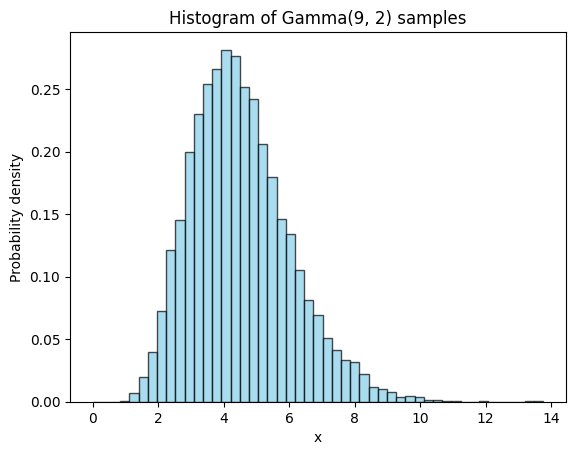

In [6]:
bins = np.linspace(0, np.max(samples), 50)

plt.hist(samples, bins, density=True, alpha=0.7, color='skyblue', edgecolor='black')
plt.title(f"Histogram of Gamma({alpha}, {beta}) samples")
plt.xlabel("x")
plt.ylabel("Probability density")
plt.show()

4\. Overlay the probability density function on the histogram and compare these in a few words. Save the resulting picture in `.png` format.
> Hint: 
> - take a look at the `scipy` [documentation](https://docs.scipy.org/doc/scipy/reference/stats.html) to avoid implementing the pdf from scratch;
> - return the bins in which the histogram is computed, and evaluate the pdf on those points.

**Answer**:

In [7]:
from scipy.stats import gamma

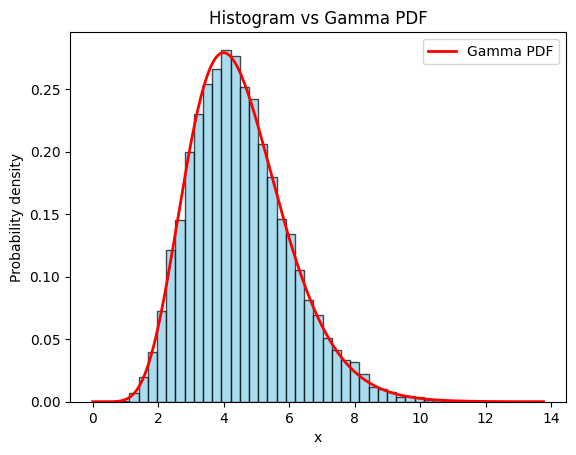

In [8]:
x = np.linspace(0, np.max(samples), 1000)
plt.plot(x, gamma.pdf(x, a=9, scale=1/2), 'r-', lw=2, label='Gamma PDF')
plt.hist(samples, bins=bins, density=True, alpha=0.7, color='skyblue', edgecolor='black')
plt.title("Histogram vs Gamma PDF")
plt.xlabel("x")
plt.ylabel("Probability density")
plt.legend()
plt.show()


---
## <a name="ex2">Exercise 2: Basic statistics with `pandas`</a>

In this second exercise, we focus on computing basic statistics, and applying linear regression to a small data set. These data are gathered in the following table, which gives the infant mortality (`X`) and the gross national product per inhabitant (`Y`) of 12 european countries :

| `X` | 190 | 128 | 180 | 212 | 56 | 192 | 68 | 98 | 110 | 197 | 181 | 233 |
|-----|-----|-----|-----|----|-----|----|----|-----|-----|-----|-----|-----|
| `Y` |  24 |  28 |  24 | 19 |  37 | 22 | 34 |  25 |  36 |  24 |  20 |  18 |

1\. For `X `and `Y`, compute the median, mean, variance and standard deviation. The data points have already been entered into a `.csv` file stored in `data/data.csv`.
> Hint: 
> - you can directly use `pandas` to load the data into a `DataFrame` ([`pd.read_csv`](https://pandas.pydata.org/docs/reference/frame.html));
> - take a look at the built-in operations available for `DataFrame` objects ([documentation](https://pandas.pydata.org/docs/reference/frame.html));
> - to display a `DataFrame` `f`:
> ```python 
> from IPython.display import display
> display(df)
> ```
> - sort the `DataFrame` with respect to the value of `X` (see [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html#pandas.DataFrame.sort_values)) This will be useful for question 3.

**Answer**:

In [12]:
import pandas as pd
from IPython.display import display

In [13]:
df = pd.read_csv("data/data.csv")
display(df)

,X,Y
0,190,24
1,128,28
2,180,24
3,212,19
4,56,37
5,192,22
6,68,34
7,98,25
8,110,36
9,197,24


In [14]:
# Moyenne
mean_X = df["X"].mean()
mean_Y = df["Y"].mean()

# Médiane
median_X = df["X"].median()
median_Y = df["Y"].median()

# Variance
var_X = df["X"].var()
var_Y = df["Y"].var()

# Écart-type
std_X = df["X"].std()
std_Y = df["Y"].std()

print("Statistics for X (infant mortality):")
print(f"Mean: {mean_X}, Median: {median_X}, Variance: {var_X}, Std: {std_X}\n")

print("Statistics for Y (GNP per inhabitant):")
print(f"Mean: {mean_Y}, Median: {median_Y}, Variance: {var_Y}, Std: {std_Y}")


Statistics for X (infant mortality):
Mean: 153.75, Median: 180.5, Variance: 3486.0227272727275, Std: 59.04255014201815

Statistics for Y (GNP per inhabitant):
Mean: 25.916666666666668, Median: 24.0, Variance: 42.4469696969697, Std: 6.5151338970868204


In [15]:
display(df.describe())

,X,Y
count,12.00000,12.000000
mean,153.75000,25.916667
std,59.04255,6.515134
min,56.00000,18.000000
25%,107.00000,21.500000
50%,180.50000,24.000000
75%,193.25000,29.500000
max,233.00000,37.000000


2\. Give the equation of the regression line of `Y` as a function of `X`.
> Hint: 
> - take a look at the functionalities available in `numpy` (e.g., `np.polyfit` and `np.polyval`);
> - if needed, note that you can retrieve the data from the resulting `pandas` `DataFrame` with the `to_numpy()` method.

**Answer**:

In [18]:
import numpy as np

X = df["X"].to_numpy()
Y = df["Y"].to_numpy()

coeffs = np.polyfit(X, Y, deg=1)
a, b = coeffs

print(f"Linear regression equation: Y = {a}X + {b}")

Linear regression equation: Y = -0.09816474883463179X + 41.00949679999131


3\. Display the cloud of points and the regression line $Y = f(X)$ on the same figure. Save the figure in `.png` format.

**Answer**:

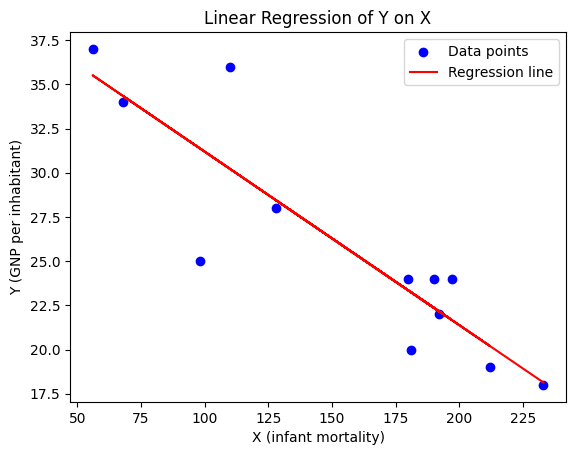

In [20]:
import matplotlib.pyplot as plt

Y_pred = a * X + b

plt.scatter(X, Y, color='blue', label='Data points')
plt.plot(X, Y_pred, color='red', label='Regression line')
plt.xlabel('X (infant mortality)')
plt.ylabel('Y (GNP per inhabitant)')
plt.title('Linear Regression of Y on X')
plt.legend()

plt.savefig("regression.png", dpi=300)

plt.show()

---
## <a name="ex3">Exercise 3: Discrete isotropic total variation</a>

This exercise is devoted to the computation of the discrete isotropic total variation (TV) of an input matrix $\mathbf{X} = [\mathbf{x}_n]_{1 \leq n \leq N} \in\mathbb{C}^{M \times N}$, which is particularly useful in Bayesian inference (e.g., for inverse problems) to promote piece-wise smooth solutions. The TV is defined as

\begin{equation*}
    \text{TV}(\mathbf{X}) = \Vert D(\mathbf{X}) \Vert_{1,2} = \sum_{m=1}^M \sum_{n=1}^N \sqrt{[\mathbf{XD}_h]^2_{m,n} + [\mathbf{D}_v\mathbf{X}]^2_{m,n}},
\end{equation*}

where $[\mathbf{Z}]_{m,n}$ denotes the elements in position $(m,n)$ of the matrix $\mathbf{Z}$,

\begin{align*}
    D(X) &= (\mathbf{XD}_h, \mathbf{D}_v\mathbf{X}) \in \mathbb{C}^{M\times N} \times \mathbb{C}^{M\times N} \\
    %
    \mathbf{XD}_h &= [\mathbf{x}_2-\mathbf{x}_1, \dotsc, \mathbf{x}_N-\mathbf{x}_{N-1}, \mathbf{0}_M] \in \mathbb{C}^{M\times N} \\
    %
    \mathbf{D}_v\mathbf{X} &= [\tilde{\mathbf{x}}_2^T-\tilde{\mathbf{x}}^T_1, \dotsc, \tilde{\mathbf{x}}^T_M-\tilde{\mathbf{x}}^T_{M-1}, \mathbf{0}_N]^T \in \mathbb{C}^{M\times N},
\end{align*}

$\mathbf{x}_n \in \mathbb{C}^{M}$ is the $n$-th column of $\mathbf{X}$, and $\tilde{\mathbf{x}}_m \in \mathbb{C}^{1\times N}$ is the $m$-th row of $\mathbf{X}$. 
The linear operator $D: \mathbb{C}^{M\times N} \rightarrow \mathbb{C}^{M\times N} \times \mathbb{C}^{M\times N} $ is the discrete gradient operator. The adjoint of $D$, $D^*: \mathbb{C}^{M\times N} \times \mathbb{C}^{M\times N} \rightarrow \mathbb{C}^{M\times N}$, is given by

\begin{align*}
    (\forall \mathbf{Y} = (\mathbf{Y}_h,\mathbf{Y}_v)), \quad D^*(\mathbf{Y}) &= \mathbf{Y}_h\mathbf{D}^*_h + \mathbf{D}^*_v\mathbf{Y}_v \\
    %
    \mathbf{Y}_h\mathbf{D}^*_h &= \big[-\mathbf{y}_{h,1},- [\mathbf{y}_{h,n}-\mathbf{y}_{h,n-1}]_{2 \leq n \leq N-1}, \mathbf{y}_{h, N-1} \big] \\
    %
    \mathbf{D}^*_v\mathbf{Y}_v &= \big[-\tilde{\mathbf{y}}_{v,1}^T,- [\tilde{\mathbf{y}}_{v,m}^T-\tilde{\mathbf{y}}^T_{v,m-1}]_{2 \leq m \leq M-1}, \tilde{\mathbf{y}}^T_{v, M-1} \big]^T
\end{align*}

where $\mathbf{y}_{h,n}$ is the $n$-th column of $\mathbf{Y}_h$, and $\tilde{\mathbf{x}}_{v,m}$ is the $m$-th row of $\mathbf{Y}_v$.

1\. Using `numpy`, implement a function `gradient2D` to compute the 2D discrete gradient operator $D$ applied to a matrix $\mathbf{X}\in\mathbb{C}^{M \times N}$ (no for loops!). Trigger an error message whenever the input array has more than 2 dimensions. If not clear from the implementation, add a few short comments to explain your code.

> Hint: 
> - to trigger an error, you can for instance use an `assert` statement, or raise an [exception (e.g., `AssertionError`)](https://docs.python.org/3/library/exceptions.html);
> - only a few operations are needed: computing vertical differences, horizontal differences, and possibly a concatenation of matrices into a single tensor (= n-dimensional array);
> - possibly useful functions: `np.diff`, `np.c_`, `np.r_` (or `np.concatenate`). 

**Answer**:

In [ ]:
import numpy as np

def gradient2D(X):
    """
    Compute the 2D discrete gradient operator D(X) = (XDh, DvX).
    Parameters
    ----------
    X : ndarray of shape (M, N)
        Input 2D array (real or complex).

    Returns
    -------
    (Gx, Gy) : tuple of ndarrays
        Gx = horizontal differences (XDh)
        Gy = vertical differences (DvX)
    """
    # Vérification X 2D
    if X.ndim != 2:
        raise ValueError("Input array must be 2D (M x N).")

    M, N = X.shape

    # Gradient horizontal
    Gx = np.diff(X, axis=1)
    Gx = np.concatenate((Gx, np.zeros((M,1), dtype=X.dtype)), axis=1)

    # Gradient vertical
    Gy = np.diff(X, axis=0)
    Gy = np.concatenate((Gy, np.zeros((1,N), dtype=X.dtype)), axis=0)

    return Gx, Gy


2\. Implement a unit-test to validate the behaviour of the `gradient2D` function. For instance, you can check the format of the output, and test the result when the function is evaluated on a constant matrix (for both a square and a non-square input matrix). Run the unit-test from the present Jupyter notebook.

**Answer**:

In [ ]:
def test_gradient2D():
    # --- Test 1 : format sortie ---
    X = np.random.rand(4, 5)  # matrice 4x5
    Gx, Gy = gradient2D(X)
    assert Gx.shape == X.shape, "Erreur : Gx n'a pas la même forme que X"
    assert Gy.shape == X.shape, "Erreur : Gy n'a pas la même forme que X"

    # --- Test 2 : matrice constante ---
    X_const_square = np.ones((3,3))
    Gx, Gy = gradient2D(X_const_square)
    assert np.allclose(Gx, 0), "Erreur : gradient horizontal non nul pour matrice constante"
    assert np.allclose(Gy, 0), "Erreur : gradient vertical non nul pour matrice constante"

    # --- Test 3 : matrice constante non carrée ---
    X_const_rect = np.full((2,4), 5.0)
    Gx, Gy = gradient2D(X_const_rect)
    assert np.allclose(Gx, 0), "Erreur : gradient horizontal non nul pour matrice constante rectangulaire"
    assert np.allclose(Gy, 0), "Erreur : gradient vertical non nul pour matrice constante rectangulaire"

    print("Tous les tests de gradient2D ont réussi!")

test_gradient2D()


Tous les tests de gradient2D ont réussi !


3\. Document the function `gradient2D` with an appropriate docstring (see Lab 1).

**Answer**:

In [24]:
def gradient2D(X):
    """
    Compute the 2D discrete gradient of a matrix.

    Parameters
    ----------
    X : ndarray
        Input 2D array (matrix).

    Returns
    -------
    dx : ndarray
        Horizontal differences (same shape as X).
    dy : ndarray
        Vertical differences (same shape as X).

    Raises
    ------
    AssertionError
        If the input X has more than 2 dimensions.

    Examples
    --------
    >>> import numpy as np
    >>> X = np.array([[1, 2], [3, 4]])
    >>> dx, dy = gradient2D(X)
    """
    assert X.ndim == 2, "Input must be a 2D matrix"
    dx = np.c_[np.diff(X, axis=1), np.zeros(X.shape[0])]
    dy = np.r_[np.diff(X, axis=0), np.zeros((1, X.shape[1]))]
    return dx, dy


4\. Using 1., define a function `tv` to compute $\text{TV}(\mathbf{X})$, $\mathbf{X}\in\mathbb{C}^{M \times N}$. Write a unit-test and document your function.

**Answer**:

In [25]:
def tv(X):
    """
    Compute the isotropic total variation (TV) of a 2D array.

    Parameters
    ----------
    X : ndarray
        Input 2D array (matrix).

    Returns
    -------
    float
        Total variation value of the input matrix.

    Raises
    ------
    AssertionError
        If the input X has more than 2 dimensions.

    Examples
    --------
    >>> import numpy as np
    >>> X = np.array([[1, 2], [3, 4]])
    >>> tv(X)
    3.1622776601683795
    """
    assert X.ndim == 2, "Input must be a 2D matrix"
    dx, dy = gradient2D(X)
    return np.sum(np.sqrt(dx**2 + dy**2))

def test_tv():
    """Unit test for tv()"""
    # Test sur une matrice constante → TV doit être 0
    X_const = np.ones((5, 5))
    assert np.isclose(tv(X_const), 0.0), "TV of constant matrix should be 0"

    # Test sur une matrice non carrée constante
    X_const2 = np.ones((3, 7))
    assert np.isclose(tv(X_const2), 0.0), "TV of constant matrix should be 0"

    # Test sur une matrice simple connue
    X_simple = np.array([[0, 1], [0, 1]])
    val = tv(X_simple)
    assert val > 0, "TV should be positive for non-constant matrices"

    print("All tests passed for tv().")

# Lancer le test
test_tv()

All tests passed for tv().


5\. Implement a function `gradient2D_adjoint` to compute $D^*(\mathbf{Y})$, the adjoint of the 2D discrete gradient operator $D$ applied to $\mathbf{Y}\in\mathbb{C}^{M \times N}\times \mathbb{C}^{M \times N}$. Add a few short comments to explain your code whenever appropriate.

**Answer**:

In [30]:
def gradient2D_adjoint(Yh, Yv):
    """
    Compute the adjoint of the 2D discrete gradient operator D^*(Y)
    for given horizontal and vertical components Yh, Yv.

    Parameters
    ----------
    Yh : ndarray
        Horizontal component (M x N) of the gradient.
    Yv : ndarray
        Vertical component (M x N) of the gradient.

    Returns
    -------
    ndarray
        2D array (M x N) corresponding to D^*(Yh, Yv).

    Raises
    ------
    AssertionError
        If input arrays Yh and Yv do not have the same shape.

    Examples
    --------
    >>> import numpy as np
    >>> Yh = np.zeros((3,3))
    >>> Yv = np.zeros((3,3))
    >>> gradient2D_adjoint(Yh, Yv)
    array([[0., 0., 0.],
           [0., 0., 0.],
           [0., 0., 0.]])
    """
    assert Yh.shape == Yv.shape, "Yh and Yv must have the same shape"
    M, N = Yh.shape

    # Horizontal adjoint: -first column, then differences, then last column
    # (basically a discrete backward divergence)
    res_h = np.zeros_like(Yh, dtype=np.complex128)
    res_h[:, 0] = -Yh[:, 0]
    res_h[:, 1:-1] = -(Yh[:, 1:-1] - Yh[:, :-2])
    res_h[:, -1] = Yh[:, -2]  # last column

    # Vertical adjoint: similar but on rows
    res_v = np.zeros_like(Yv, dtype=np.complex128)
    res_v[0, :] = -Yv[0, :]
    res_v[1:-1, :] = -(Yv[1:-1, :] - Yv[:-2, :])
    res_v[-1, :] = Yv[-2, :]  # last row

    return res_h + res_v

6\. Implement a unit-test to validate `gradient2D_adjoint`, e.g., by checking the size of the output from the function and verifying that `gradient2D_adjoint` is adjoint to `gradient2D`, i.e., for any $\mathbf{X}\in\mathbb{C}^{M \times N}$ and $\mathbf{Y}\in\mathbb{C}^{M \times N}\times \mathbb{C}^{M \times N}$:

\begin{equation}
    \forall \mathbf{X} \in \mathbb{C}^{M \times N}, \mathbf{Y} = (\mathbf{Y}_h, \mathbf{Y}_v) \in \mathbb{C}^{M \times N} \times \mathbb{C}^{M \times N}, \;
    %
    \langle D(\mathbf{X}), \mathbf{Y} \rangle_{\mathbb{C}^{M \times N} \times \mathbb{C}^{M \times N}} = \langle \mathbf{X}, D^*(\mathbf{Y}) \rangle_{\mathbb{C}^{M \times N}}, 
\end{equation}

where 

\begin{align}
    &\forall \mathbf{U}, \mathbf{V} \in \mathbb{C}^{M \times N}, \; \langle \mathbf{U}, \mathbf{V} \rangle_{\mathbb{C}^{M \times N}} = \text{Tr}(\mathbf{U}^H \mathbf{V}) = \sum_{m=1}^M \sum_{n=1}^N u_{m,n}^* v_{m,n}, \\
    &\forall \mathbf{U} = (\mathbf{U}_h, \mathbf{U}_v), \mathbf{V} = (\mathbf{V}_h, \mathbf{V}_v) \in \mathbb{C}^{M \times N} \times \mathbb{C}^{M \times N}, \; \langle \mathbf{U}, \mathbf{V} \rangle_{\mathbb{C}^{M \times N} \times \mathbb{C}^{M \times N}} = \langle \mathbf{U}_h, \mathbf{V}_h \rangle_{\mathbb{C}^{M \times N}} + \langle \mathbf{U}_v, \mathbf{V}_v \rangle_{\mathbb{C}^{M \times N}}.
\end{align}

> Hint: to verify `gradient2D_adjoint` is the adjoint of `gradient2D`, evaluate the scalar products above for randomly drawn matrices. Set the random generator to a known state for reproducibility (see [Exercise 1](#ex1)).

**Answer**:

In [ ]:
def test_gradient2D_adjoint():
    """Unit test to validate gradient2D_adjoint"""

    rng = np.random.default_rng(42)  # seed pour reproductibilité
    M, N = 5, 7  # dimensions aléatoires

    # Matrice X aléatoire
    X = rng.standard_normal((M, N)) + 1j*rng.standard_normal((M, N))

    # Matrices Yh, Yv aléatoires
    Yh = rng.standard_normal((M, N)) + 1j*rng.standard_normal((M, N))
    Yv = rng.standard_normal((M, N)) + 1j*rng.standard_normal((M, N))

    # Calcul des gradients
    DXh, DXv = gradient2D(X)

    # Produit scalaire <D(X), Y>
    inner1 = np.vdot(DXh, Yh) + np.vdot(DXv, Yv)

    # Produit scalaire <X, D*(Y)>
    DX_star = gradient2D_adjoint(Yh, Yv)
    inner2 = np.vdot(X, DX_star)

    # Vérification de la dualité
    assert np.allclose(inner1, inner2), "gradient2D_adjoint is not the adjoint of gradient2D"

    # Vérification de la taille
    assert DX_star.shape == X.shape, "Output of gradient2D_adjoint should have same shape as input X"

    print("All tests passed for gradient2D_adjoint.")

# Lancer le test
test_gradient2D_adjoint()

All tests passed for gradient2D_adjoint.


[Bonus, **optional**]. Generalize the `gradient2D` to any number of dimensions ($\mathbf{X} \in \mathbb{C}^{N_1 \times N_2 \times \dotsc \times N_p}$), i.e., by returning tensors obtained by computing differences along each of its dimensions.
> Hint: 
> - you may use a loops here, and/or list comprehension. Using slice objects (see [np.s_](https://numpy.org/doc/stable/reference/generated/numpy.s_.html?highlight=s_#numpy.s_) and [this page](https://stackoverflow.com/questions/24432209/python-index-an-array-using-the-colon-operator-in-an-arbitrary-dimension)) can be an interesting option.
>
> - the definition of the scalar product above can be extended to the case of tensors as follows:
> \begin{equation}
    \mathbf{U}, \mathbf{V} \in \mathbb{C}^{N_1 \times N_2 \times \dotsc \times N_p}, \; \langle \mathbf{U}, \mathbf{V} \rangle_{\mathbb{C}^{N_1 \times N_2 \times \dotsc \times N_p}} =  \sum_{n_1 = 1}^{N_1}  \sum_{n_2 = 1}^{N_2} \dotsc \sum_{n_p = 1}^{N_p} u_{n_1, n_2, \dotsc, n_p}^* v_{n_1, n_2, \dotsc, n_p}   
\end{equation}

**Answer**:

In [ ]:
# your code

## Reference

```bibtex
@article{condat:hal-01309685,
  TITLE = {{Discrete Total Variation: New Definition and Minimization}},
  AUTHOR = {Condat, Laurent},
  URL = {https://hal.archives-ouvertes.fr/hal-01309685},
  JOURNAL = {{SIAM Journal on Imaging Sciences}},
  PUBLISHER = {{Society for Industrial and Applied Mathematics}},
  VOLUME = {10},
  NUMBER = {3},
  PAGES = {1258--1290},
  YEAR = {2017},
  MONTH = Aug,
  DOI = {10.1137/16M1075247},
  KEYWORDS = { variational image processing ; total variation ;  finite-difference schemes ;  coarea formula},
  PDF = {https://hal.archives-ouvertes.fr/hal-01309685v3/file/Condat-newTV.pdf},
  HAL_ID = {hal-01309685},
  HAL_VERSION = {v3},
}
```
